## Spam Message Classification

## 1) Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Datasets/spam.tsv', sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
df['label'].value_counts() / len(df) * 100 #  Porcentagem de cada um

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [11]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [12]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [15]:
data = ham.append(spam, ignore_index=True)

In [16]:
data.shape

(1494, 4)

In [17]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

In [18]:
data.head()

,label,message,length,punct
0,ham,No. I.ll meet you in the library,32,2
1,ham,"Yeah, probably but not sure. Ilol let u know, ...",124,6
2,ham,Is there any movie theatre i can go to and wat...,84,1
3,ham,Boo. How's things? I'm back at home and a litt...,66,7
4,ham,Otherwise had part time job na-tuition..,40,3


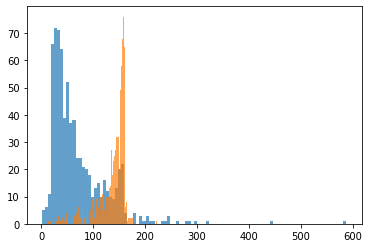

In [19]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()

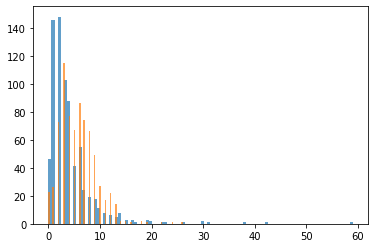

In [20]:
plt.hist(data[data['label'] == 'ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100, alpha=0.7)
plt.show()

### Split Data in Training and Testing

In [21]:
data

,label,message,length,punct
0,ham,No. I.ll meet you in the library,32,2
1,ham,"Yeah, probably but not sure. Ilol let u know, ...",124,6
2,ham,Is there any movie theatre i can go to and wat...,84,1
3,ham,Boo. How's things? I'm back at home and a litt...,66,7
4,ham,Otherwise had part time job na-tuition..,40,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# X => message
# Y => label
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

In [24]:
1494*0.3 # Porcentagem do teste

448.2

In [25]:
X_train.shape

(1045,)

In [26]:
X_test.shape

(449,)

## 2) Building the Model (Random Forest)

In [27]:
 from sklearn.feature_extraction.text import TfidfVectorizer
 from sklearn.ensemble import RandomForestClassifier
 
 from sklearn.pipeline import Pipeline

In [28]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=100))])

In [29]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

## 3) Predicting the Model (Random Forest)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [33]:
accuracy_score(y_test, y_pred)

0.9510022271714922

In [34]:
0.955456570155902 * 449 #  Acertou 429 de 449

429.0

In [35]:
confusion_matrix(y_test, y_pred)
# HAM row 1 => acertou 226 errou 1
# SPAM row 2 => acertou 199 errou 19

array([[224,   3],
       [ 19, 203]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## 4) Building the Model (SVM) - Suport Vector Machine

In [38]:
from sklearn.svm import SVC

In [41]:
svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', SVC(C=100, gamma='auto'))])

In [42]:
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

## 5) Predicting the results (SVM) - Suport Vector Machine

In [43]:
y_pred = svm.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.9376391982182628

In [45]:
confusion_matrix(y_test, y_pred)

array([[220,   7],
       [ 21, 201]])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94       227
        spam       0.97      0.91      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [47]:
test1 = ['Hello, You are learning atural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [49]:
# Using Random Forest
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [50]:
# Using SVM
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
